## Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
lr=LinearRegression()

## Preprocessing and analysis

Index(['Date time', 'Volume [mV]', 'Light_Level [Ohms]',
       'Temperature-DHT [Celsius]', 'Pressure [Hectopascal]',
       'Temperature-BMP [Celsius]', 'Relative_Humidity [%]',
       'Air_Quality [Ohms]', 'Carbon_Monoxide [Ohms]',
       'Nitrogen_Dioxide [Ohms]'],
      dtype='object')


C:\Users\ibrah\AppData\Local\Temp\ipykernel_22720\1391305509.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_data.corr()


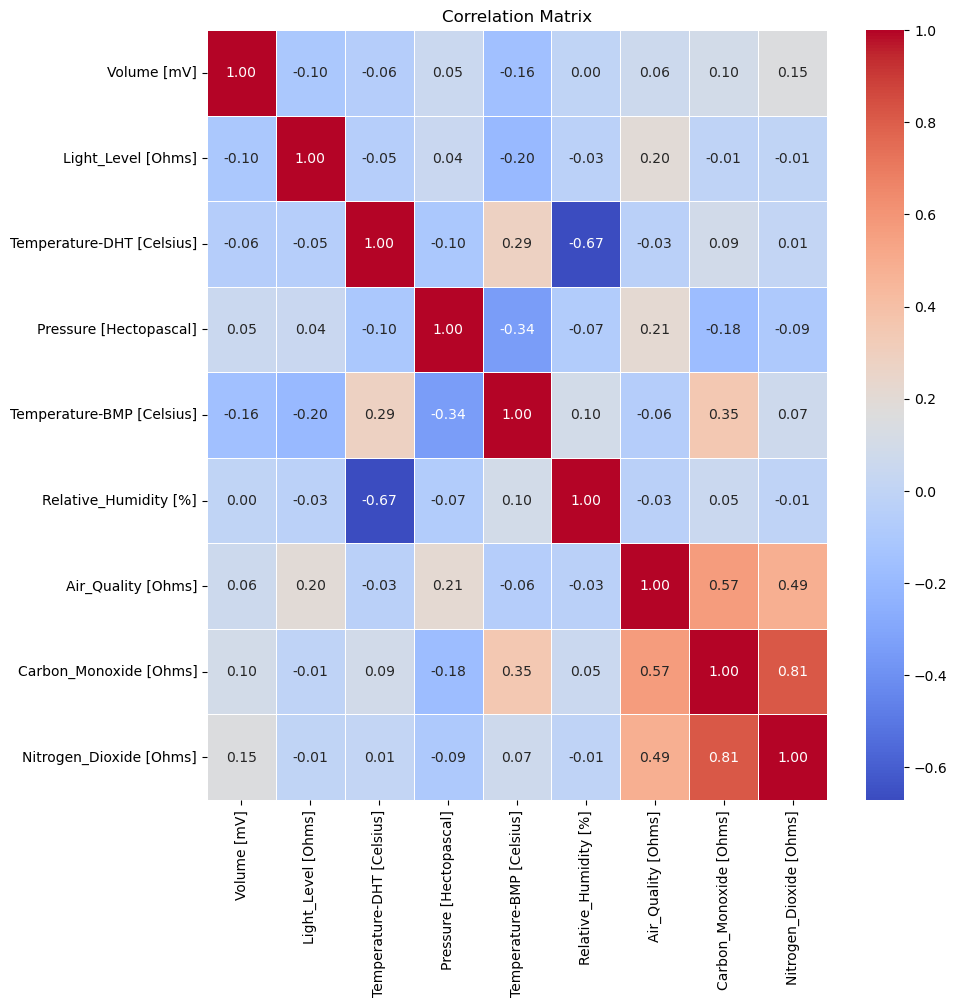

In [2]:
df=pd.read_csv('AirPi.csv')
print(df.columns)
selected_data = df
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [3]:
df.isnull().sum()

Date time                    0
Volume [mV]                  0
Light_Level [Ohms]           0
Temperature-DHT [Celsius]    0
Pressure [Hectopascal]       0
Temperature-BMP [Celsius]    0
Relative_Humidity [%]        0
Air_Quality [Ohms]           0
Carbon_Monoxide [Ohms]       0
Nitrogen_Dioxide [Ohms]      0
dtype: int64

In [4]:
df.describe()

,Volume [mV],Light_Level [Ohms],Temperature-DHT [Celsius],Pressure [Hectopascal],Temperature-BMP [Celsius],Relative_Humidity [%],Air_Quality [Ohms],Carbon_Monoxide [Ohms],Nitrogen_Dioxide [Ohms]
count,14572.000000,1.457200e+04,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000
mean,98.519454,3.073862e+06,31.264722,1018.500853,29.720627,29.618573,39308.520165,380296.523647,31383.254968
std,23.407421,4.465441e+06,12.726083,10.136798,3.731857,17.990821,4090.780070,61832.936302,6477.697016
min,75.161290,1.508543e+02,-960.459985,987.977217,19.685000,17.030000,22698.402350,231195.111600,9736.175575
25%,87.258065,2.533149e+03,26.980000,1012.491107,25.345000,27.218750,36443.796958,337502.192400,27261.169485
50%,92.258065,1.145456e+04,32.860000,1018.997775,31.270000,29.490000,39899.045545,367037.240200,30519.468865
75%,98.870968,9.964250e+06,34.230000,1023.965787,32.405000,31.415000,42285.097540,421873.414750,35145.908447
max,371.774194,1.022000e+07,41.740001,1044.401250,36.630000,1985.514999,59637.824020,656726.085600,62588.252200


In [28]:
x=np.array(df['Nitrogen_Dioxide [Ohms]']).reshape(-1,1)
y=np.array(df['Carbon_Monoxide [Ohms]']).reshape(-1,1)
x_scaled=StandardScaler()
y_scaled=StandardScaler()
x=x_scaled.fit_transform(x)
y=y_scaled.fit_transform(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_predected=np.array(lr.predict(x_test))

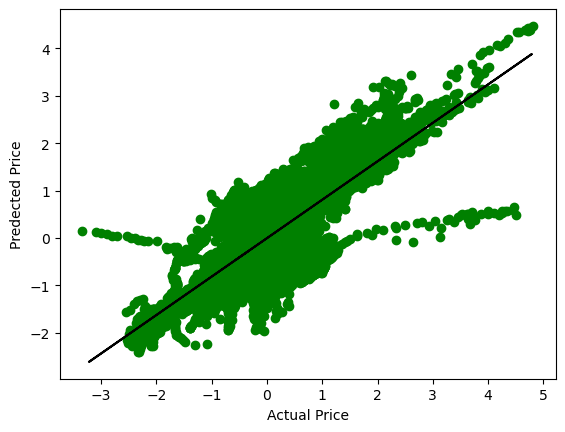

In [31]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_test,y_predected, color = 'k')
plt.xlabel("Actual Price")
plt.ylabel("Predected Price")
plt.show()

In [32]:
temp=int(r2_score(y_test,y_predected)*100)
print(f"Accuracy: {temp}%")

Accuracy: 67%


In [36]:
user_nitrogen=35145.908447
temp=int(lr.predict(np.array(user_nitrogen).reshape(-1,1)))
print(f"Predected carbon: {temp} Ohms")

Predected carbon: 28458 Ohms
